# 10. Green function for tight-binding lattice model

`read_wann90()` reads a file of the wannier90-like format and returns the real-space tight-binding Hamiltonian as an array (vector).

$$
G(k,\omega) = [ \omega - \epsilon_k ] ^{-1}
$$

In [1]:
ENV["PROJECT_PATH_ED"]="../envs/KED"
include("../src/mybase.jl")

hr  = read_wann90( "ex_wann_1d_2sites.dat" )

@show hr
@show typeof(hr)

for (i,hri) in Iterators.enumerate(hr)
    @show (i,hri)
end

  Activating project at `~/dmft/ed/github/KaiED/envs/KED`


hr = [(0, 0, 0, 1, 2, -1.0, 0.0), (0, 0, 0, 2, 1, -1.0, 0.0), (1, 0, 0, 2, 1, -1.0, 0.0), (-1, 0, 0, 1, 2, -1.0, 0.0)]
typeof(hr) = Vector{Tuple{Int64, Int64, Int64, Int64, Int64, Float64, Float64}}
(i, hri) = (1, (0, 0, 0, 1, 2, -1.0, 0.0))
(i, hri) = (2, (0, 0, 0, 2, 1, -1.0, 0.0))
(i, hri) = (3, (1, 0, 0, 2, 1, -1.0, 0.0))
(i, hri) = (4, (-1, 0, 0, 1, 2, -1.0, 0.0))


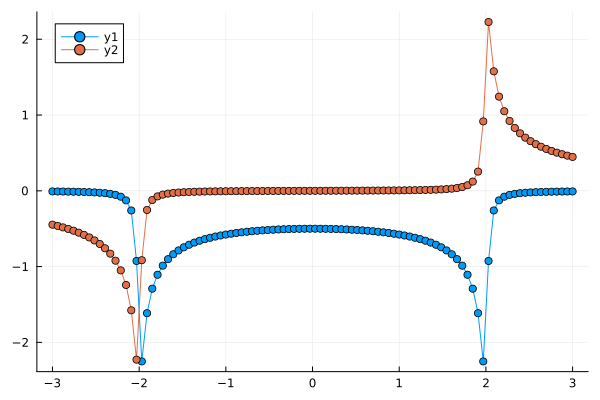

In [2]:
nk      = 1000

xarr, wkarr = gausslegendre( nk )
karr    = [ [(x .+ 1) * pi, 0,0] for x in xarr ]
wkarr   = wkarr / 2.        # integrate an unit volume

norb    = 2
hk  = hr_to_hk( hr, norb, karr )

NReFreq   = 100
ReFreqGrid      = LinRange( -3, 3, NReFreq )
epsilon         = 0.03
ReFreqGridBroad = ReFreqGrid .+ im * epsilon

glocal_w  = GetGreenLocalFromHkGrid( hk, wkarr, ReFreqGridBroad )
gdiag_w = [ [ g[i,i] for g in glocal_w ] for i in 1:norb ]


using Plots


p_g     = plot(  ReFreqGrid, imag(gdiag_w[1]) , marker=:circle)
p_g     = plot!( ReFreqGrid, real(gdiag_w[1]) , marker=:circle)

  0.180836 seconds (1.09 M allocations: 303.410 MiB, 18.03% gc time, 43.54% compilation time)
hyblatt_w obtained.
  0.039432 seconds (97.40 k allocations: 6.407 MiB, 91.24% compilation time)
hyblattdiag_w obtained.


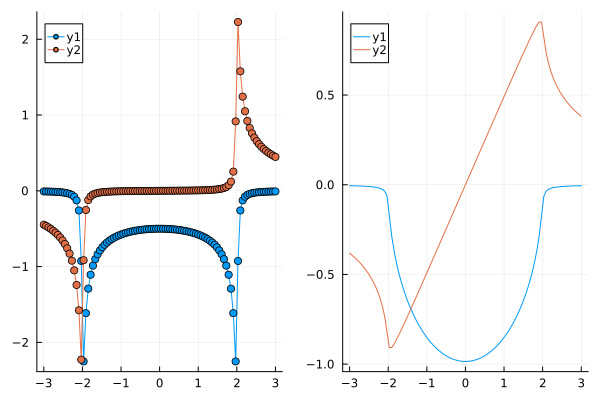

In [3]:
@time hyblatt_w  = GetHybFromGreenLocalFromHkGrid( hk, wkarr, ReFreqGridBroad )
println("hyblatt_w obtained.") ; flush(stdout)
@time hyblattdiag_w = [ [ g[i,i] for g in hyblatt_w ] for i in 1:norb ]
println("hyblattdiag_w obtained.") ; flush(stdout)

p_h     = plot(  ReFreqGrid, imag(hyblattdiag_w[1]) )
p_h     = plot!( ReFreqGrid, real(hyblattdiag_w[1]) )

plot( p_g, p_h )

  0.220415 seconds (1.51 M allocations: 396.176 MiB, 16.21% gc time, 40.09% compilation time)
hyblatt_iw obtained.
  0.037294 seconds (89.39 k allocations: 6.187 MiB, 98.94% compilation time)
hyblattdiag_iw obtained.


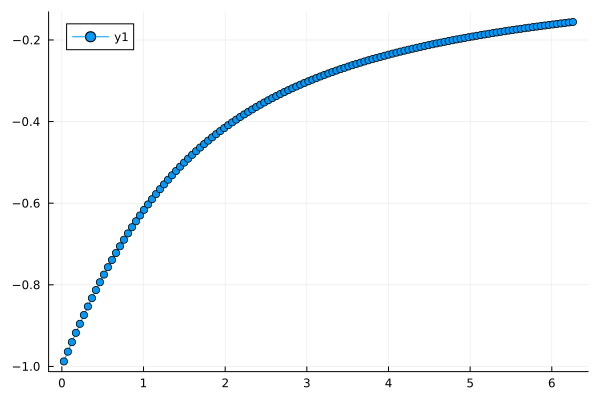

In [4]:
#### Matsubara Green Function Setup ####
beta    = 128
NImFreq  = 1*beta
ImFreqGridVal   = GetImFreqValGrid( beta, NImFreq )
ImFreqGrid      = ImFreqGridVal * im

@time hyblatt_iw  = GetHybFromGreenLocalFromHkGrid( hk, wkarr, ImFreqGrid )
println("hyblatt_iw obtained.") ; flush(stdout)
@time hyblattdiag_iw = [ [ g[i,i] for g in hyblatt_iw ] for i in 1:norb ]
println("hyblattdiag_iw obtained.") ; flush(stdout)

plot( ImFreqGridVal, imag(hyblattdiag_iw[1]), marker=:circle )

